In [2]:
%pip install pm4py

import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

  Using cached pm4py-2.7.16-py3-none-any.whl.metadata (4.8 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached intervaltree-3.1.0.tar.gz (32 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.2 MB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached contourpy-1.3.2-cp312-cp312-many

In [ ]:
file_path = "Data/event_logs_pompiers.csv"
df = pd.read_csv(file_path)

intervention_id = 1
df_case = df[df["case_id"] == intervention_id]

df_case = dataframe_utils.convert_timestamp_columns_in_df(df_case)
#print(df_case.columns)

parameters = {
    log_converter.Variants.TO_EVENT_LOG.value.Parameters.CASE_ID_KEY: "case_id"
}

df_case = df_case.rename(columns={
    "activity": "concept:name",
    "timestamp": "time:timestamp"
})

event_log = log_converter.apply(df_case, parameters=parameters, variant=log_converter.Variants.TO_EVENT_LOG)

/home/brandon/Projet_TER/TEST_byMe/env_pompier/lib/python3.12/site-packages/pm4py/objects/log/util/dataframe_utils.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pandas_utils.dataframe_column_string_to_datetime(
/home/brandon/Projet_TER/TEST_byMe/env_pompier/lib/python3.12/site-packages/pm4py/objects/log/util/dataframe_utils.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = strpfromiso.fix_dataframe_column(df[col])


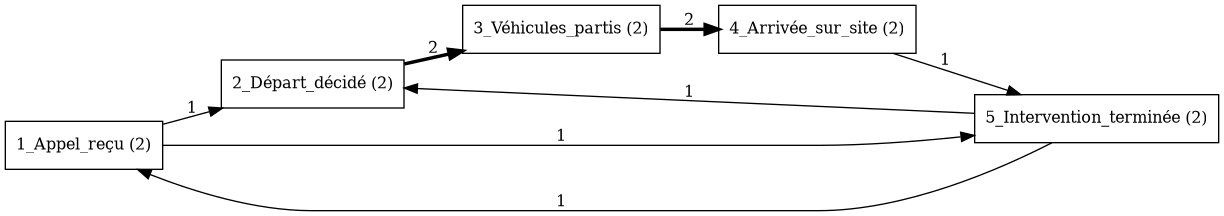

In [38]:
df_case_g = dfg_discovery.apply(event_log)
gviz = dfg_visualizer.apply(df_case_g, log=event_log, variant=dfg_visualizer.Variants.FREQUENCY)
dfg_visualizer.view(gviz)

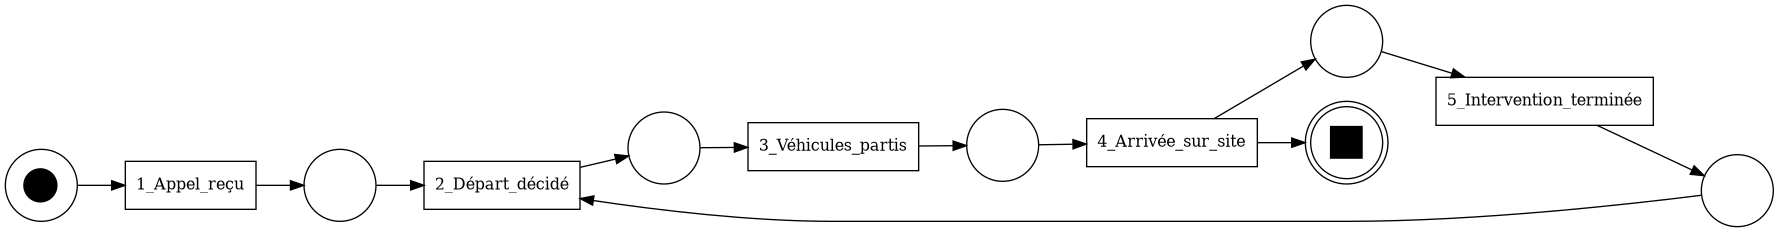

In [35]:
net, initial_marking, final_marking = alpha_miner.apply(event_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

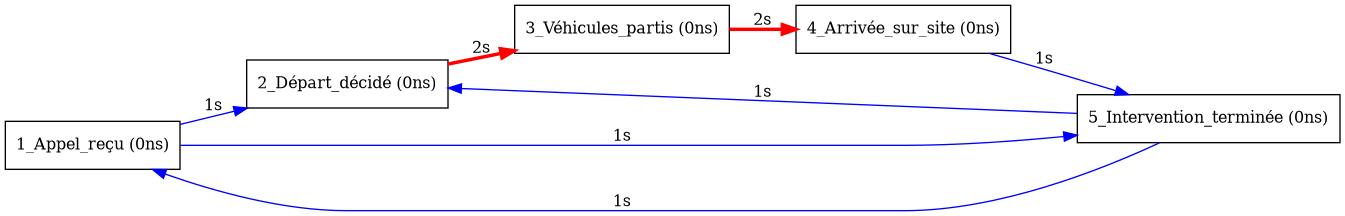

In [36]:
gviz_perf = dfg_visualizer.apply(df_case_g, log=event_log, variant=dfg_visualizer.Variants.PERFORMANCE)
dfg_visualizer.view(gviz_perf)